# Adagrad 与 普通的Gradient Descent 以及 scale 效果展示

### 下面使用最简单的单变量回归演示普通的GD和Adagrad

在单变量回归的情况下，平方损失函数为凸函数，有最优解。最优解可以通过最小二乘法求得。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_data = np.array([338, 333, 328, 207, 226, 25, 179, 60, 208, 606])
y_data = np.array([640, 633, 619, 393, 428, 27, 193, 66, 226, 1591])

# 最小二乘解
w_best = ((x_data*y_data).mean() - x_data.mean() * y_data.mean()) / (np.square(x_data).mean() - np.square(x_data.mean()))
b_best = y_data.mean() - x_data.mean() * w_best
w_best, b_best

(2.6694549667622574, -188.43319665732656)

In [3]:
# 用于绘制 平方损失 的等值线
x = np.arange(-200, -100, 1)    # bias
y = np.arange(-5, 5, 0.1)       # weight
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)

for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] += (y_data[n] - b - w * x_data[n])**2
        Z[j][i] /= len(x_data)


### 使用普通的梯度下降算法, 结果对于这种凸函数也不容易找到最优解

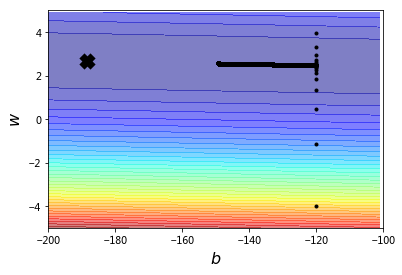

In [4]:
# 普通的梯度下降算法

b = -120    # initial b
w = -4      # initial w
lr = 1e-6   # learning rate
iteration = 100000

# store initial values for plotting
b_history = [b]
w_history = [w]

# iterater
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    # calculate gradient
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0 * (y_data[n] - b - w * x_data[n])
        w_grad = w_grad - 2.0 * (y_data[n] - b - w * x_data[n]) * x_data[n]

    # update patameters
    b = b - lr * b_grad
    w = w - lr * w_grad

    # store paramaters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([b_best], [w_best], 'X', ms=12, markeredgewidth=3, color='black')
plt.plot(b_history, w_history, 'o', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

### 改为能够自适应梯度的 Adagrad，与上面对比，可以比较好的找到最优解

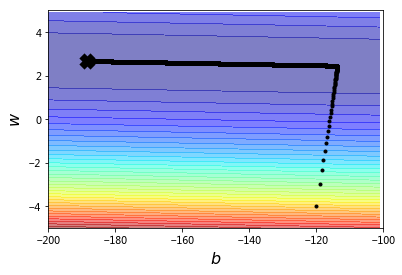

In [5]:
# 使用 Adagrad 
# ydata = b + w * xdata
b = -120    # initial b
w = -4      # initial w
lr = 1e-6   # learning rate
lr = 1
iteration = 100000

# store initial values for plotting
b_history = [b]
w_history = [w]

lr_b = 0
lr_w = 0

# iterater
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    # calculate gradient
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0 * (y_data[n] - b - w * x_data[n])
        w_grad = w_grad - 2.0 * (y_data[n] - b - w * x_data[n]) * x_data[n]
    
    # Adagrad vs GradientDescent
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    # update patameters
    b = b - lr / np.sqrt(lr_b) * b_grad
    w = w - lr / np.sqrt(lr_w) * w_grad

    # store paramaters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'X', ms=12, markeredgewidth=3, color='black')
plt.plot(b_history, w_history, 'o', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

### 尝试对变量做Scale到均值0，标准差1，之后再使用普通的梯度下降算法

In [6]:
x_data = (np.array(x_data) - np.array(x_data).mean()) / np.std(x_data)
# y_data = (np.array(y_data) - np.array(y_data).mean()) / np.std(y_data)

# 最小二乘解
w_best = ((x_data*y_data).mean() - x_data.mean() * y_data.mean()) / (np.square(x_data).mean() - np.square(x_data.mean()))
b_best = y_data.mean() - x_data.mean() * w_best
w_best, b_best

(416.467486138367, 481.6)

In [7]:
# 用于绘制 平方损失 的等值线
x = np.arange(400, 500, 1)    # bias
y = np.arange(400, 500, 1)       # weight
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)

for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] += (y_data[n] - b - w * x_data[n])**2
        Z[j][i] /= len(x_data)


### 做变换之后，w和b的等值线很类似于正圆，每一步的梯度下降，都会近似往最优点方向走。与之前单独使用GD相比，现在使用GD效果更好

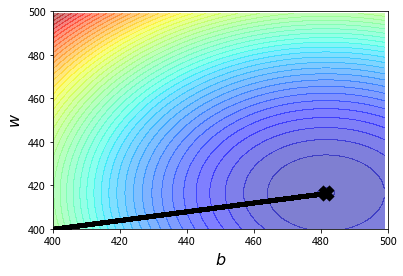

In [8]:
# 普通的梯度下降算法

b = 400    # initial b
w = 400      # initial w
lr = 1e-5   # learning rate
iteration = 100000

# store initial values for plotting
b_history = [b]
w_history = [w]

# iterater
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    # calculate gradient
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0 * (y_data[n] - b - w * x_data[n])
        w_grad = w_grad - 2.0 * (y_data[n] - b - w * x_data[n]) * x_data[n]

    # update patameters
    b = b - lr * b_grad
    w = w - lr * w_grad

    # store paramaters for plotting
    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([b_best], [w_best], 'X', ms=12, markeredgewidth=3, color='black')
plt.plot(b_history, w_history, 'o', ms=3, lw=1.5, color='black')
plt.xlim(400, 500)
plt.ylim(400, 500)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()